The Dataset
start with the dataset then do the modeling


# Commuting and Stress




![Gridlock](https://github.com/Osheah/images/raw/master/commute-stress/img/gridlock.jpg)



to do
- [ ] something is not right - when the kernel is cleared and run the numbers dont look right on the first pass - tweek the ratings to show a difference
- [ ] add section on link between the variables - investigate distribution of commuters
- [ ] add conclusion 
- [ ] change the distribution of the distance to a log normal distribution  https://arxiv.org/ftp/arxiv/papers/1510/1510.03952.pdf
- [ ] Issues to fix if there is time - distribution of distance should be log normal or something like it
- [ ] distribution of impedance should be gamma something to do with queueing and traffic congestion
- [ ] Distribution of duration and is a function of distance and impedance as the time taken to travel wil be linked to the distance to travel and the speed of travelling it 
- [ ] time spent as a commuter is a distrabution linked to job  - god will I have time left to fix this? focus on one thing at a time - 
step 1 identify the distributions for 
distance lognormalish https://papers.tinbergen.nl/04045.pdf
duration
impedance
time
transport - maybe
step 2
identify the paramaters for the distribution 
distance  lognormal([mean, sigma, size]) need a dataset to estimate paramater size is 370, mean and sigma can be got from the data - so find some data
duration
impedance
time

In [135]:
# duration info
#data from http://airo.maynoothuniversity.ie/datastore/commuting-t11-sa

#https://stackoverflow.com/questions/26063231/read-specific-columns-with-pandas-or-other-python-module
fields = ['Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_Under_15_mins_2011', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_Quarter_To_Under_Half_Hour_2011', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_Half_Hour_To_Under_Three_Quarter_Hours_2011', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_Three_Quarter_Hours_To_Under_One_Hour_2011', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_One_Hour_To_Under_One_Hour_Thirty_Mins_2011', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_One_And_Half_Hours_And_Over_2011', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_Not_Stated_2011', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_Total_2011']
# https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte
dur_rw = pd.read_csv("http://airo.maynoothuniversity.ie/files/dDATASTORE/small_areas/theme_11_small_areas.csv", low_memory=False, encoding='latin-1', usecols=fields)
dur_rw.nunique()
#https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
dur_rw.rename(columns = {'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_Under_15_mins_2011':'0-15 min', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_Quarter_To_Under_Half_Hour_2011':'15-30 min', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_Half_Hour_To_Under_Three_Quarter_Hours_2011':'30-45 min', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_Three_Quarter_Hours_To_Under_One_Hour_2011':'45-60 min', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_One_Hour_To_Under_One_Hour_Thirty_Mins_2011':'60-90 min', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_One_And_Half_Hours_And_Over_2011':'over 90 min', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_Not_Stated_2011':'no info', 'Population_Aged_5_Over_By_Journey_Time_To_Work_School_College_Total_2011':'total'}, inplace = True)
dur_rw
## duration bands in Cassidy are duration = ['0-30 minutes', '30-60 minutes', 'Over 60 minutes']
# group the columns into the bands maybe drop the no info and total column - also ignore the scale of population for the moment
dur_rw['0-30 minutes'] = dur_rw['0-15 min']+dur_rw['15-30 min']
dur_rw.drop(['0-15 min', '15-30 min', 'no info', 'total'], axis = 1, inplace = True)
dur_rw
dur_rw['30-60 minutes'] = dur_rw['30-45 min']+dur_rw['45-60 min']
dur_rw.drop(['30-45 min', '45-60 min'], axis = 1, inplace = True)
dur_rw
dur_rw['Over 60 minutes'] = dur_rw['60-90 min']+dur_rw['over 90 min']
dur_rw.drop(['60-90 min', 'over 90 min'], axis = 1, inplace = True)
dur_rw
# get paramaters # size = 370, need to get sigma and mu
sigma = dur_rw.stack().std()  # adapted from https://stackoverflow.com/questions/25140998/pandas-compute-mean-or-std-standard-deviation-over-entire-dataframe
mu = dur_rw.stack().mean()
mu
print(mu, sigma, size)
y_sim_rw = np.random.lognormal(mu, sigma, size)


dur_sim_rw_counts = Counter(dur_rw['Duration'])
df_

'''
# calculate the number of responses to each duration band
dur_counts = Counter(df['Duration'])
# check the number
print("The number in each of the duration bands is ", dur_counts)
# create an indexed dataframe with the number of counts
df_dur = pd.DataFrame.from_dict(dur_counts, orient='index')
# check it looks okay
df_dur
'''

45.83434299725948 43.701103546820725 370


TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

## Simulate commuting stress

Summarise the paper by Tony Cassidy (Cassidy, 1992)



## Why simulate data?

### What is data simulation

Data simulation typically involves generating pseudo random numbers. It is often used in stochastic modeling where some event changes over time. Simulating data has many real world applications. It is used in life sciences, quality control, measuring response rates of customer services, financial and investment modeling and many other areas.  There are several compelling reasons for simulating data [Ref](https://www.sciencedirect.com/topics/earth-and-planetary-sciences/data-simulation). 

#### Known paramaters
In a simulated model, the values of the underlying parameters are known. This allows a comparison to be made with the real world dataset it purports to model. 

#### Tweak parameters
Simulating data allows for the parameters to be fine tuned. Parameters may influence each other and performing small adjustments to one parameter can help identify its affect on other inputs such as in sensitivity analysis. In real world situations it may be impossible to control the environment to such an extent that such fine tuned adjustments can be made. 

#### Sample errors
There is a natural variation in data measurements. Collecting one set of flower samples to measure their petal widths is unlikely to yield the exact same measurements if collected at another date. Similarly, asking one set of questions on a survey may produce different responses when asked at another time. There is a natural variation in measurements. The variation in sampling data is a measure of statistical precision. Running data simulations is a valuable way of seeing the effect of randomness on natural processes.    

#### Check things are working correctly
Data simulations are useful to check that real world systems are on target or working as expected. A model can be run several times with different parameters or sample sizes and the means or other estimator can be calculated and compared to the real world system. 

#### Check statistical power
Is there an actual relationship between input values and outputs values? Statistical power is a measure of finding an effect on the data when it exists. It is linked to the sample size used to model the phenomenon in question. Data simulation allows variation in sample size so that statistical power can be analysed. 

#### Check parameter identification
Are the right parameters used? Would a different parameter fit the model better? Data simulation allows for various 'runs' to be conducted with varying parameters. Results can then be checked for clusters and signs that the parameter is indeed a parameter (or not). 

#### Check estimator strength
Data simulations produce estimators which can then be checked for robustness. If the model does not predict an effect measured by the estimator but the real world data shows such an effect then there is an assumption violation. Simulations help identify this by limiting certain parameters to test out specific ones. This allows the strength of the estimator or the strength of underlying biases to be measured. 

#### Develops understanding of real world phenomena
If an analyst can model the real world phenomena in question then they have abstracted its core features, modeled it and recreated the item investigated. This aids their understanding of this phenomenon. 
references for this came from (Kéry & Royle, 2016)

### Stochastic modeling
Stochastic modeling is a type of mathematical modeling that uses random processes and probability distributions to model some data that can change with time. It is often applied to financial modeling in investments or population modeling in life sciences(Wikipedia contributors, 2018 September 17). 


## Chose a real world phenomenon
The topic chosen for this project is commuting factors and its impact on stress levels. 

### Why this topic?
This topic was chosen as I previously commuted several hours per day for both college and work, and currently have family members that make long commutes daily. I hypothesize that there is a relationship between the length of commute, level of control of the journey, the level of impedance experienced commuting and the length of time spent as a commuter with the level of stress experienced. I expect that longer journeys are more stressful than shorter ones; High impedance (e.g. slow traffic) produces more stress and that a low level of perceived control is linked to more stress. I suspect that the longer people spend commuting, the more stress the report but it also may be that the longer people spend commuting the less stress they report as they become use to their daily routine. I came across Cassidy's 1992 paper *Commuting-related Stress: Consequences and Implications* and thought it suitable to model for this assignment. 


## Commuting and Stress
Modern life is stressful. In pre written history times people experienced stress; Finding food safety and shelter without getting killed takes a toll. Stress can be very useful especially if escaping from a predator. The fight or flight physiological stress response can mean surviving for another day [ref](https://en.wikipedia.org/wiki/Fight-or-flight_response). The same response is found with modern incarnations of stress but the triggers are for the most part very different. Now, we are unlikely to face attacks from a saber tooth tiger. Instead, modern stress triggers are more insidious and chronic. It can be a constant anxiety that permeates everyday life with no clear source or solution. Hassard *et al* (2014) noted that the cost of work related stress in the EU was estimated at 20 billion in 2002. Cassidy, (1992) noted that the UK's gross national product looses up to ten percent per annum due to stress and its consequences. There are many factors contributing to stress, financial stress, relationship stress, health stress to name but a few. This report looks at one source of reported stress, the daily commute. The Central Statistics Office (2017) puts the number of people (workers and students) commuting in Ireland at almost 3 million. They found a steady rise in the number of people commuting to work. What effect does this daily routine have on the psychological and physical health of the population? Costa *et al* as cited in Cassidy (1992) noted that within the European Union, commuters and distance traveled have increased but the duration of the commute has decreased. We are traveling further for work and getting there faster. This has knock on implications with the number of road accidents as well as impact on the home and work life of the people involved. 

Cassidy 1992 noted that while commuting itself is stressful it also compounds stress in other domains. It can affect home life, recreational activities and increase work absenteeism. Costa *et al* as cited in Cassidy (1992) found public transport commuters reported a more stressed lifestyle. Whereas Gulian *et al* as cited in Cassidy (1992) found 'road rage' stress was experienced by people who drive to work. Both modes of transportation produce stress. Schaeffer *et al* as cited in Cassidy found that stress levels were mitigated by the **level of control** (or at least perceived control) the commuter had on their journey. 

Cassidy, (1992) investigated stress and commuting. He conducted a study of 370 participants who commute to work. He collected information via a questionnaire on measures such as daily commute **distance** and **duration**, **time** spent commuting and any **impedance**. Impedance was defined as the average miles per hour the commute took. The lower the speed, the higher the impedance. In addition he also collected information on transportation used, biographical information such as age, sex, marital status, eduction, occupation, length of time in current job, information on home, commuting, work, leisure and personal satisfaction. For the purpose of this report some of Cassidy's measures will be modeled by simulated data and some fields will be simplified. Aspects of Cassidy's paper are modeled in the sections below.


## Model and synthesise the data

### import libraries

In [2]:
# for rendering plots in jupyter notebook
%matplotlib inline 
# pandas for the dataframe
import pandas as pd 
# numpy for array minimpuation and random number generation
import numpy as np
# matplotlib for plots
import matplotlib.pyplot as plt 

import collections # for groupings
from collections import Counter # for groupings

### Create the dataset structure


Create the number of rows needed for the dataset. 

In [3]:
# Set the index
x = range(0, 370)
print(len(x))

370


Create the dataset headings. 

In [4]:
df = pd.DataFrame(columns = ['Distance', 'Duration', 'Time', 'Impedance', 'Stress'], index = x)
# There are also additional headings that can be added such as age mode of transport, gender etc. 
# check headers are present
df.head()

,Distance,Duration,Time,Impedance,Stress
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check the size of the dataset
size = 370
print("The size of the dataset is: ", size)

The size of the dataset is:  370


## The main variables

There are five key variables in this model. The first four, distance, duration, time and impedance were investigated to see if they had a relationship with the fifth variable *Stress*. 

The **variables** related to commuting and stress are;  
* Distance
* Duration
* Time 
* Impedance
* Stress

These variables are not mutually exclusive of each other. For example *Distance* and *Duration* are correlated. E.g. commutes that are further away tend to have a longer duration. As the effects of one variable cannot be isolated from the effects of other variables a correlational study is a suitable model.  

### Define the variables

* **Distance** of the commute. This is the distance commuted. This was measured in miles. There were four categories (in Cassidy's report, 1992) that participants could select to classify their distance commuted. These were; 

    * 0-5 miles
    * 6-15 miles
    * 16-30 miles
    * Over 30 miles

The majority of commuters surveyed were 15 or under miles away from their work. 


* **Duration** of the commute. This refers to the typical duration of commute i.e. the typical time taken to make the journey to work. This was measured in minutes (min). Duration was categorised into three bands, namely;  
    * 0-30 minutes 
    * 30-60 minutes
    * Over 60 minutes

The majority of participants reported their duration of commute at under 60 minutes. 


* **Time** commuting. This refers to the time period participants spent as a commuter. This was measured in months.  There were four categories that participants could classify their time into, namely.

    * 1-29 months 
    * 30-60 months
    * 60-131 months
    * Over 132 months

* **Impedance** The impedance of the commute was also measured. This was defined as the average miles per hour of the commute. It was measured in miles per hour (mph). Impedance was classified into three bands,namely; 

    * 17 mph or less
    * 17.3-30 mph
    * Over 30 mph

* **Stress** Cassidy (1992) measured stress by scoring responses on a questionnaire on a number of factors along five specific domains of the participant's life namely; 

    * Home domain - perceived stress and financial stress, social support levels, time at home, use of home life to ameliorate work stress. 
    * Commuting domain - perceived commuting stress and mood.  
    * Work domain - perceived stress, sources of work stress and commitment to work
    * Leisure domain - approach to leisure time including time spent exercising, socialising and perceived fitness.
    * Personal domain - problem solving ability and internal/external attribution of events, levels of situational control, motivation and confidence. In addition, levels of satisfaction with life and general perceived stress  were measured. 
 
 
Neither the questions asked, nor the scoring method used, were noted in Cassidy's paper. Therefore, in this report and for simplicity and clarity,  stress is assumed to be measured across a *single* general domain by the *Perceived Stress Scale* (Cohen, Kamarck & Mermelstein, 1983). 

### The Perceived Stress Scale 
The Perceived Stress Scale (PSS) was developed by Cohen, Kamarck and Mermelstein in their 1983 paper *A Global Measure of Perceived Stress* published in The Journal of Health and Social Behavior. This is a standard psychological measure of perceived non specific stress. It is used to assess stress and measure the effectiveness of stress reducing interventions (Wikipedia contributors, 2018, May 31). 

#### PSS questions

The PSS elicits responses on a five point Likert scale. A Likert scale involves asking respondents to indicate the level to which they agree or disagree with a series of statements on a scale from 0 to x, where x is the number of points on the Likert scale (Wikipedia contributors, 2018, November 26). For the PSS a response of 0 indicates 'never', 1 indicates 'almost never', 2 indicates 'sometimes', 3 indicates 'fairly often' and 4 indicates 'very often. The PSS contains 10 questions and are listed below. 

**Perceived Stress Scale** (10 Items)
The questions in this scale ask you about your feelings and thoughts during the last month. In each case, please indicate with a check how often you felt or thought a certain way.

1. In the last month, how often have you been upset because of something that happened unexpectedly?
2. In the last month, how often have you felt that you were unable to control the important things in your life?
3. In the last month, how often have you felt nervous and "stressed"?
4. In the last month, how often have you felt confident about your ability to handle your personal problems?
5. In the last month, how often have you felt that things were going your way?
6. In the last month, how often have you found that you could not cope with all the things that you had to do?
7. In the last month, how often have you been able to control irritations in your life?
8. In the last month, how often have you felt that you were on top of things?
9. In the last month, how often have you been angered because of things that were outside of your control?
10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?
(Taken from [PSS](http://www.psy.cmu.edu/~scohen/PSS.html) )

#### Scoring the PSS
The Likert scale used in the PSS is balanced to avoid bias in answering all the questions at one extreme of the scale. 
To determine the score reverse the scores on questions 4, 5, 7 and 8. Then sum the reversed score along with the remainder of the scores to produce a total. Individual scores can range from a minimum of zero to a maximum of 40. The higher the score the greater the perceived stress. Scores under 13 indicate low perceived stress, scores between 14 to 26 indicate moderate perceived stress and scores greater than 27 are considered high perceived stress (Cohen, Kamarck & Mermelstein, 1983). 


In addition, other variables were collected that may prove useful to model

* Transport
* Gender
* Age


**Transport** refers to the mode of transportation which in Cassidy's (1992) study, can be either public transport or car. It might be useful to further subdivide public transport into bus and train and personal transport into car and bicycle. Research suggests that mode of transportation has an effect on stress with the most stress experienced by car users and least by cyclists (Gatersleben & Uzzell, 2007). Though there is some evidence that commuting by car has greater locus of control which reduces stress (add reference). Stutzer & Frey (2008) noted the *The Commuting Paradox* where the financial benefits of commuting are negated by the negative factors involved such as stress and the impact on home and work life. 

**Gender** refers to the biological sex of the participant. For Cassidy's study there were 217 male and 153 female participants. Research suggests that there is relationship between stress and gender that would be interesting to explore. Different genders report different physiological stress reactions (American Psychological Association, 2010). 


**Age** Cassidy's study (1992) also measured the ages of the participants. Age does impact physical and mental responses to stress (Monteiro et al, 2014), however it was not modeled in this report for simplicity.  


### Investigate the type of variables involved

link between distance and duration and impedance - maths speed = distance over time
link between time spent commuting and distance - full of hardier commuters



## Model the data

The data for the five variables (Distance, Duration, Time, Impedance, Stress) was simulated first. Further variables of Transport and Age can be added later if time permits. 

### Adding the variables


### Distance
Add the simulated distance data. This is simulated with np.random.choice

#### Why?
NumPy Random's choice was used to simulate the distances. Choice was used as it allows for the weighted random selection of categorical data. The distance category has four bands (0-5 miles, 6-15 miles, 16-30 miles and Over 30 miles). In addition the data is ordinal, as there is a progression from 0-5 miles to over 30 miles (UCLA: Statistical Consulting Group. (n.d.)). However as these choices were items on a survey, the NumPy Random 'choice' function would be suitable as a model rather than a numerical NumPy Random function such as Bernoulli (Binomial with n = 1) distribution (NumPy community, 2018; Oliphant, 2006). 

There was a total of 346 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the distance bands. A 'Distance' array was created containing the four distance bands, 0-5 miles, 6-15 miles, 16-30 miles, over 30 miles. There were 109 response in the first band so this was weighted as 109/346, 114 for the second band giving a probability of 114/346, 67 responses for the 16-30 mile response giving a weighting of 67/346 and lastly 56 responses for the over 30 mile distance giving a weighting of 56/346.  The model of the Distance variable can be found below.


In [6]:
# set up the survey Distance categories
distance = ['0-5 miles', '6-15 miles', '16-30 miles', 'Over 30 miles']
# calculate the total number of responders to this question
tot_dist = 109+114+67+56
# generate the response with 'choice' function
y_dist = np.random.choice(distance, size, p=[109/tot_dist, 114/tot_dist, 67/tot_dist, 56/tot_dist])


In [7]:
# check the tot_dist number
tot_dist

346

In [8]:
# check the first few values of the array
y_dist[:7]

array(['Over 30 miles', '0-5 miles', '0-5 miles', '6-15 miles',
       '16-30 miles', 'Over 30 miles', '6-15 miles'], dtype='<U13')

Change the y_dist distance array to a dataframe and add it to the simulated model. 

In [9]:
# change the array to a dataframe and add it to the dataframe
df['Distance'] = pd.Series(y_dist)
# check its headings
df.head()

,Distance,Duration,Time,Impedance,Stress
0,Over 30 miles,NaN,NaN,NaN,NaN
1,0-5 miles,NaN,NaN,NaN,NaN
2,0-5 miles,NaN,NaN,NaN,NaN
3,6-15 miles,NaN,NaN,NaN,NaN
4,16-30 miles,NaN,NaN,NaN,NaN


In [10]:
# check the end of the dataframe
df.tail()

,Distance,Duration,Time,Impedance,Stress
365,0-5 miles,NaN,NaN,NaN,NaN
366,6-15 miles,NaN,NaN,NaN,NaN
367,Over 30 miles,NaN,NaN,NaN,NaN
368,0-5 miles,NaN,NaN,NaN,NaN
369,0-5 miles,NaN,NaN,NaN,NaN


In [11]:
# check the info on the dataframe
df.describe()


,Distance,Duration,Time,Impedance,Stress
count,370,0.0,0.0,0.0,0.0
unique,4,0.0,0.0,0.0,0.0
top,0-5 miles,NaN,NaN,NaN,NaN
freq,129,NaN,NaN,NaN,NaN


In [12]:
# check the bands on the dataframe
df.nunique()

Distance     4
Duration     0
Time         0
Impedance    0
Stress       0
dtype: int64

Lets plot the histogram of the commute distance bands. To plot the histogram the number of values in each duration band needs to be calculated. 

In [13]:
# calculate the number of responses to each distance band
dist_counts = Counter(df['Distance'])
# check to see if counts look reasonable
dist_counts


Counter({'Over 30 miles': 47,
         '0-5 miles': 129,
         '6-15 miles': 118,
         '16-30 miles': 76})

In [14]:
# sum counts
# list the values
dist_counts.values()
# sum the values
sum(dist_counts.values())

370

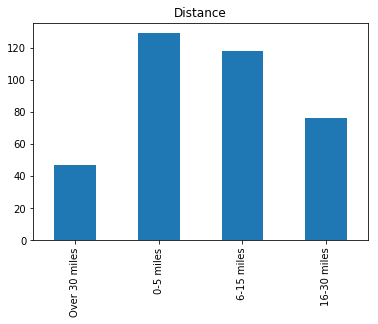

In [15]:
# create an indexed dataframe with the number of counts
# code adapted from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html
df_dist = pd.DataFrame.from_dict(dist_counts, orient='index')
                      
#plot the bar chart of the distance counts
df_dist.plot(kind='bar', title='Distance', legend = False)
plt.show()

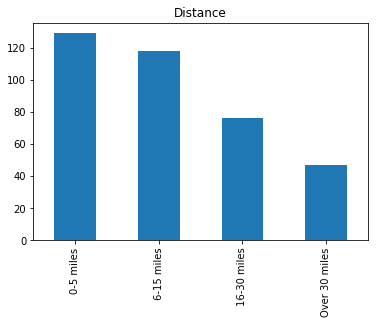

In [16]:
# set the order in which the plots are displayed for easier comparisons
df_dist.reindex(['0-5 miles', '6-15 miles',  '16-30 miles', 'Over 30 miles']).plot(kind='bar', title='Distance', legend = False)
plt.show()

This shows that most simulated participants traveled between 6 and 15 miles with the second longest duration being 0-5 miles. The other two bands had lower reported values. This compares favourably to Cassidy's findings of 109 traveling under 0.5 miles, 114 traveling between 6-15 miles, 67 traveling between 16-30 miles and 56 traveling over 30 miles. 


In [17]:
# create Cassidy's Distance counts as a dataframe
cass_dist = pd.DataFrame(np.array([[109, 114, 67, 56]]), columns=['0-5 miles', '6-15 miles',  '16-30 miles', 'Over 30 miles'])
cass_dist = cass_dist.transpose()
# check shape
cass_dist.head()


,0
0-5 miles,109
6-15 miles,114
16-30 miles,67
Over 30 miles,56


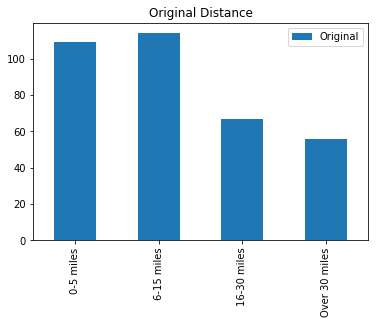

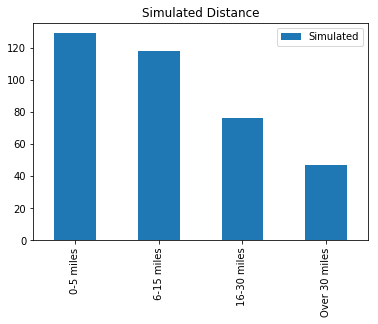

In [18]:
# set the order in which the plot displays the various bars for the original data
cass_dist.reindex(['0-5 miles', '6-15 miles',  '16-30 miles', 'Over 30 miles']).plot(kind='bar', title='Original Distance')
plt.legend(["Original"])
# set the order in which the plot displays the various bars for the simulated data
df_dist.reindex(['0-5 miles', '6-15 miles',  '16-30 miles', 'Over 30 miles']).plot(kind='bar', title='Simulated Distance')
plt.legend(["Simulated"]);
plt.show()


# to do figure out how to display both histograms/bars side by side on the same plot


### Duration
Add the duration data. In Cassidy's study the duration of commute was 137 participants had 0-30 minutes duration; 121 participants had a commute duration of 30-60 minutes and 97 participants commuting time was over 60 minutes (Cassidy, 1992). This was simulated with np.random.choice. 

#### Why?
NumPy Random's choice was used to simulate the duration of commute. There are three bands and the data is ordinal, as there is a progression from 30 minutes to over 60 minutes. However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 355 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the duration bands. A 'Duration' array was created containing the three duration bands, 0 to 30 minutes, 30- 60 minutes and over 60 minutes. There were 137 responses in the first band so this was weighted as 137/355, 121 for the second band giving a probability of 121/355 and 97 responses for the Over 60 minutes response giving a weighting of 97/355.  The model of the Duration variable can be found below.


In [19]:
# add the duration categories
duration = ['0-30 minutes', '30-60 minutes', 'Over 60 minutes']
# check its added
print("The duration of the commute is ", duration)

The duration of the commute is  ['0-30 minutes', '30-60 minutes', 'Over 60 minutes']


In [20]:
# calculate the total number of responses to this question
tot_dur = 137+121+97
# check its added
print("The number of respondants to the duration of commute question is ", tot_dur)

The number of respondants to the duration of commute question is  355


In [21]:
# generate the responses to the 'Duration' category
y_dur = np.random.choice(duration, size, p=[137/tot_dur, 121/tot_dur, 97/tot_dur])
# check the first few values of the array
y_dur[:7]


array(['30-60 minutes', 'Over 60 minutes', '30-60 minutes',
       '0-30 minutes', '0-30 minutes', '0-30 minutes', '30-60 minutes'],
      dtype='<U15')

Change the y_dur duration array to a dataframe and add it to the simulated model. 

In [22]:
df['Duration'] = pd.Series(y_dur)
# check the first few values
df.head()

,Distance,Duration,Time,Impedance,Stress
0,Over 30 miles,30-60 minutes,NaN,NaN,NaN
1,0-5 miles,Over 60 minutes,NaN,NaN,NaN
2,0-5 miles,30-60 minutes,NaN,NaN,NaN
3,6-15 miles,0-30 minutes,NaN,NaN,NaN
4,16-30 miles,0-30 minutes,NaN,NaN,NaN


In [23]:
# check that the end of the dataframe looks okay
df.tail()

,Distance,Duration,Time,Impedance,Stress
365,0-5 miles,30-60 minutes,NaN,NaN,NaN
366,6-15 miles,Over 60 minutes,NaN,NaN,NaN
367,Over 30 miles,0-30 minutes,NaN,NaN,NaN
368,0-5 miles,Over 60 minutes,NaN,NaN,NaN
369,0-5 miles,30-60 minutes,NaN,NaN,NaN


Lets plot the histogram of the commute duration bands

In [24]:
# calculate the number of responses to each duration band
dur_counts = Counter(df['Duration'])
# check the number
print("The number in each of the duration bands is ", dur_counts)

The number in each of the duration bands is  Counter({'0-30 minutes': 136, '30-60 minutes': 128, 'Over 60 minutes': 106})


In [25]:
# create an indexed dataframe with the number of counts
df_dur = pd.DataFrame.from_dict(dur_counts, orient='index')
# check it looks okay
df_dur


,0
30-60 minutes,128
Over 60 minutes,106
0-30 minutes,136


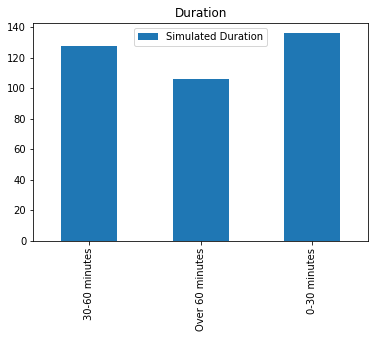

In [26]:
#plot the bar chart of the duration counts
df_dur.plot(kind='bar', title='Duration')
plt.legend(["Simulated Duration"]);
plt.show()

In [27]:
# create Cassidy's Duration counts as a dataframe
cass_dur = pd.DataFrame(np.array([[137, 121, 97]]), columns=['0-30 minutes', '30-60 minutes',  'Over 60 minutes'])
cass_dur = cass_dur.transpose()
# check shape
cass_dur.head()


,0
0-30 minutes,137
30-60 minutes,121
Over 60 minutes,97


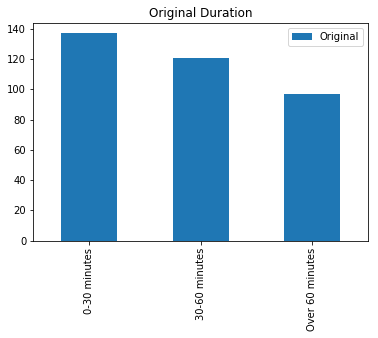

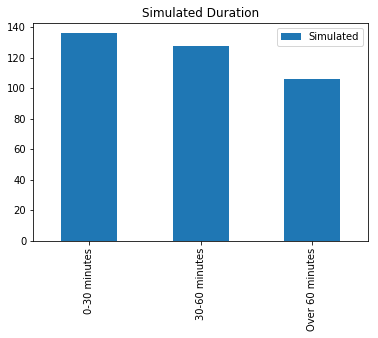

In [28]:
# set the order in which the plot displays the various bars for the original data
cass_dur.reindex(['0-30 minutes', '30-60 minutes',  'Over 60 minutes']).plot(kind='bar', title='Original Duration')
plt.legend(["Original"])
# set the order in which the plot displays the various bars for the simulated data
df_dur.reindex(['0-30 minutes', '30-60 minutes',  'Over 60 minutes']).plot(kind='bar', title='Simulated Duration')
plt.legend(["Simulated"]);
plt.show()


# to do figure out how to display both histograms/bars side by side on the same plot


This shows that durations of over an hour were not as common as durations between 0- 30 minutes (the most popular commute duration in Cassidy's study (1992)) with 30-60 minutes being the second most common duration of commute for the participants in the survey.  

### Time
Add the time data. In Cassidy's study the time commuting does not refer to the duration of the commute but to the overall time participants spent as a commuter traveling this duration. There was 343 respondents to this question on the survey with 73 responses indicating a commuting time of 1-29 months, 99 commuting for between 30 and 60 months, 80 commuting between 60 and 131 months and 132 participants commuting for over 132 months (Cassidy, 1992).  This was simulated with np.random.choice. 

#### Why?
NumPy Random's choice was used to simulate the time spent commuting. There are four bands in this category. Again the data is ordinal, as there is a progression from 1 month to over 132 months.However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 343 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the time bands. A 'Time' array was created containing the four time bands, 1 - 29 months, 30-60 months, 60-131 months and over 132 months. There were 73 responses in the first band so this was weighted as 73/343, 99 for the second band giving a probability of 99/343; 80 responses for the third band giving a weighting of 80/343 and finally 91 responses in the Over 132 month band giving a weighting of 91/343.   The model of the Time variable can be found below.

In [29]:
# add the  time category bands
time = ['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']
# check the bands
time

['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']

In [30]:
# calculate the number of responses to the Time category question
tot_time = 73+99+80+91
# check the number of respondents to the time question
print("The number of respondents to the time question is ", tot_time)

The number of respondents to the time question is  343


In [31]:
# generate the time category responses with their respective weightings
y_time = np.random.choice(time, size, p=[73/tot_time, 99/tot_time, 80/tot_time, 91/tot_time])
# check the first few values look okay
y_time[:7]

array(['1-29 months', '1-29 months', 'Over 132 months', 'Over 132 months',
       '1-29 months', 'Over 132 months', '60-131 months'], dtype='<U15')

Change the y_time time array to a dataframe and add it to the simulated model. 

In [32]:
df['Time'] = pd.Series(y_time)
# check the data has been added to the Time column in the dataframe
df.head()

,Distance,Duration,Time,Impedance,Stress
0,Over 30 miles,30-60 minutes,1-29 months,NaN,NaN
1,0-5 miles,Over 60 minutes,1-29 months,NaN,NaN
2,0-5 miles,30-60 minutes,Over 132 months,NaN,NaN
3,6-15 miles,0-30 minutes,Over 132 months,NaN,NaN
4,16-30 miles,0-30 minutes,1-29 months,NaN,NaN


In [33]:
# check the end of the dataframe
df.tail()

,Distance,Duration,Time,Impedance,Stress
365,0-5 miles,30-60 minutes,60-131 months,NaN,NaN
366,6-15 miles,Over 60 minutes,30-60 months,NaN,NaN
367,Over 30 miles,0-30 minutes,30-60 months,NaN,NaN
368,0-5 miles,Over 60 minutes,1-29 months,NaN,NaN
369,0-5 miles,30-60 minutes,30-60 months,NaN,NaN


Lets plot the histogram of the time spent as a commuter bands

In [34]:
# calculate the number of responses to each duration band
time_counts = Counter(df['Time'])
# check the Time counters look okoay
time_counts

Counter({'1-29 months': 89,
         'Over 132 months': 82,
         '60-131 months': 84,
         '30-60 months': 115})

In [35]:
# create an indexed dataframe with the number of counts
df_time = pd.DataFrame.from_dict(time_counts, orient='index')
# check the dataframe of the time counts looks okay
df_time


,0
1-29 months,89
Over 132 months,82
60-131 months,84
30-60 months,115


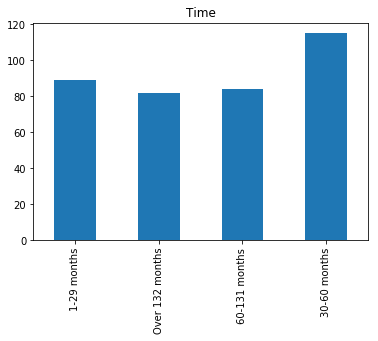

In [36]:
#plot the bar chart of the duration counts
df_time.plot(kind='bar', title='Time', legend = False)
plt.show()

In [37]:
# create Cassidy's Time counts as a dataframe
cass_time = pd.DataFrame(np.array([[73, 99, 80, 91]]), columns=['1-29 months', '30-60 months', '60-131 months', 'Over 132 months'])
cass_time = cass_time.transpose()
# check shape
cass_time.head()


,0
1-29 months,73
30-60 months,99
60-131 months,80
Over 132 months,91


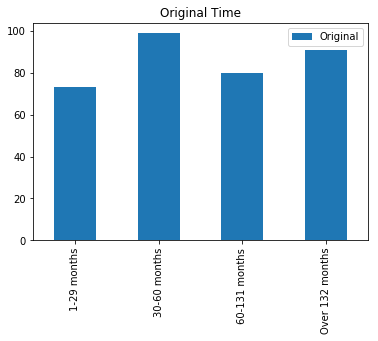

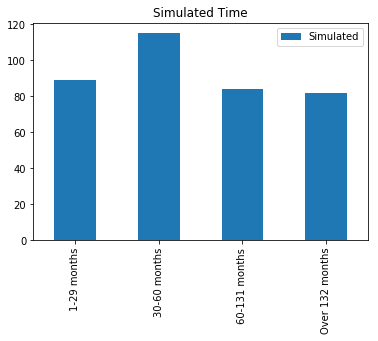

In [38]:
# set the order in which the plot displays the various bars for the original data
cass_time.reindex(['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']).plot(kind='bar', title='Original Time')
plt.legend(["Original"])
# set the order in which the plot displays the various bars for the simulated data
df_time.reindex(['1-29 months', '30-60 months', '60-131 months', 'Over 132 months']).plot(kind='bar', title='Simulated Time')
plt.legend(["Simulated"]);
plt.show()


# to do figure out how to display both histograms/bars side by side on the same plot


This shows that the most common timeframe of being a commuter in the study was 30-60 months and the least common one was 1-29 months. The simulated data is broadly similar to Cassidy's study in this respect. 

Cassidy's study shows that the most popular time lengths of commuting was 30-60 months (2.5 - 5 years), followed closely by 60-131 years (5 - approx 11 years) then 1-29 months ( up to 2.5 years) closely followed by over 132 months (11 years +)

### Impedance
Add the impedance data. In Cassidy's study the impedance (or speed traveled on the commute) was divided into three bands. All participants responded to this question on the survey. The majority of them (207) reported speeds of 17 mph or less as a hindering factor; 97 respondents reported speeds between 13.3 and 30 mph and 66 reported speeds over 30 mph. Again this is simulated with np.random.choice

#### Why?
NumPy Random's choice was used to simulate the time spent commuting. There are three bands in this category, 17 mph or less, 17.3 - 30 mph and Over 30 mph. Again the data is ordinal, as there is a progression from 17 mph to over 30 mph. However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 370 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the time bands (which in this case was the number of people surveyed). An 'Impedance' array was created containing the three impedance bands. There were 207 responses in the first band so this was weighted as 207/370, 97 for the second band giving a probability of 97/370; 66 responses for the third band giving a weighting of 66/370. The model of the Impedance variable can be found below.

In [39]:
# create the impedance bands
impedance = ['17 mph or less', '17.3-30 mph', 'Over 30 mph']
# check the list
impedance

['17 mph or less', '17.3-30 mph', 'Over 30 mph']

In [40]:
# calculate the number of responses to the impedance question
tot_imp = 207+97+66
print("The number of respondents to the Impedance question is  ", tot_imp)

The number of respondents to the Impedance question is   370


In [41]:
# generate responses to the impedence question
y_imp = np.random.choice(impedance, size, p=[207/tot_imp, 97/tot_imp, 66/tot_imp])
# check the first few values on the array
y_imp[:7]

array(['17.3-30 mph', '17 mph or less', '17 mph or less', '17.3-30 mph',
       'Over 30 mph', '17 mph or less', '17 mph or less'], dtype='<U14')

Change the y_imp impedance array to a dataframe and add it to the simulated model. 

In [42]:
df['Impedance'] = pd.Series(y_imp)
# check the Impedance values are added
df.head()

,Distance,Duration,Time,Impedance,Stress
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,NaN
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,NaN
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,NaN
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,NaN
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,NaN


In [43]:
# check the end of the dataframe looks okay
df.tail()

,Distance,Duration,Time,Impedance,Stress
365,0-5 miles,30-60 minutes,60-131 months,17 mph or less,NaN
366,6-15 miles,Over 60 minutes,30-60 months,17 mph or less,NaN
367,Over 30 miles,0-30 minutes,30-60 months,17 mph or less,NaN
368,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,NaN
369,0-5 miles,30-60 minutes,30-60 months,17 mph or less,NaN


Lets plot the histogram of the impedance distance bands

In [44]:
# calculate the number of responses to each impedance band
imp_counts = Counter(df['Impedance'])
# check the counts look okay
imp_counts

Counter({'17.3-30 mph': 109, '17 mph or less': 197, 'Over 30 mph': 64})

In [45]:
# create an indexed dataframe with the number of counts
df_imp = pd.DataFrame.from_dict(imp_counts, orient='index')
# check the counts dataframe for impedence looks okay
df_imp


,0
17.3-30 mph,109
17 mph or less,197
Over 30 mph,64


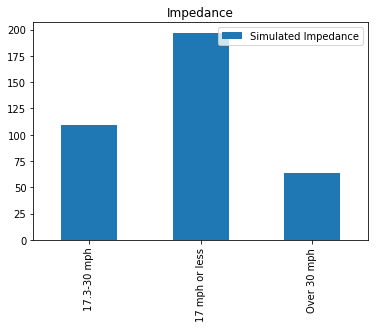

In [46]:
#plot the bar chart of the duration counts
df_imp.plot(kind='bar', title='Impedance')
plt.legend(["Simulated Impedance"])
plt.show()

In [47]:
# create Cassidy's Time counts as a dataframe
cass_imp = pd.DataFrame(np.array([[207, 97, 66]]), columns=['17 mph or less', '17.3-30 mph', 'Over 30 mph'])
cass_imp = cass_imp.transpose()
# check shape
cass_imp.head()


,0
17 mph or less,207
17.3-30 mph,97
Over 30 mph,66


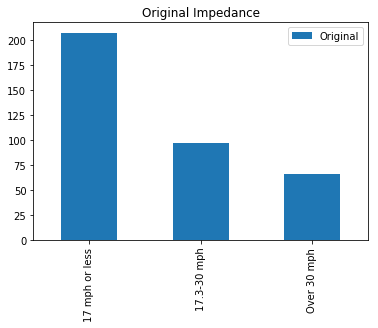

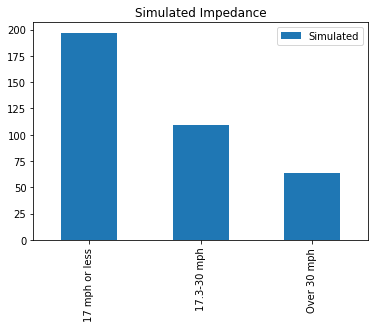

In [48]:
# set the order in which the plot displays the various bars for the original data
cass_imp.reindex(['17 mph or less', '17.3-30 mph', 'Over 30 mph']).plot(kind='bar', title='Original Impedance')
plt.legend(["Original"])
# set the order in which the plot displays the various bars for the simulated data
df_imp.reindex(['17 mph or less', '17.3-30 mph', 'Over 30 mph']).plot(kind='bar', title='Simulated Impedance')
plt.legend(["Simulated"]);
plt.show()


# to do figure out how to display both histograms/bars side by side on the same plot


This showed that the most common type of impedance was speeds under 17 mph with much less reported difficulty with the other two bands. The over 30 mph was reported as having the lowest impedance. 

### Transport
The method of transportation data could be car or public transport. This is simulated with np.random.choice. Cassidy asked participants their means of commuting. There were two bands to choose from, car or public transport. 313 participants responded to this question with 124 car users and 189 public transport commuters. This was simulated with np.random.choice. 

#### Why?
NumPy Random's choice was used to simulate the mode of transportation. There are two bands in this category, car or public transport. Like gender the data is nominal However as these choices were items on a survey NumPy Random's 'choice' function would be suitable as a model. There was a total of 313 responses to this section of the survey so this was taken as the total when calculating the probability weightings for each of the transport bands. A 'Transport' array was created containing the two transport bands, car and public transport. There were 124 responses in the first band so this was weighted as 124/313 and 189 responses for the public transport band giving a probability of 189/313. The model of the Transport variable can be found below.

In [49]:
# create the Transport response bands  
transport = ['Car', 'Public transport']
# check the list
transport

['Car', 'Public transport']

In [50]:
# calculate the number of responses
tot_tran = 124+189

# check the value
print("The number of respondents to the transport question is ", tot_tran)

The number of respondents to the transport question is  313


In [51]:
# generate the transport response array
y_tran = np.random.choice(transport, size, p= [124/tot_tran, 189/tot_tran])
# check that the array looks okay by looking at its first few values
y_tran[:7]

array(['Public transport', 'Car', 'Public transport', 'Car',
       'Public transport', 'Car', 'Public transport'], dtype='<U16')

Change the y_tran transportation array to a dataframe and add it to the simulated model. 

In [52]:
df['Transport'] = pd.Series(y_tran)
#check the dataframe looks okay by showing its first few values
df.head()

,Distance,Duration,Time,Impedance,Stress,Transport
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,NaN,Public transport
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,NaN,Car
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,NaN,Public transport
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,NaN,Car
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,NaN,Public transport


In [53]:
# check that the end of the dataframe looks okay
df.tail()

,Distance,Duration,Time,Impedance,Stress,Transport
365,0-5 miles,30-60 minutes,60-131 months,17 mph or less,NaN,Public transport
366,6-15 miles,Over 60 minutes,30-60 months,17 mph or less,NaN,Car
367,Over 30 miles,0-30 minutes,30-60 months,17 mph or less,NaN,Car
368,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,NaN,Car
369,0-5 miles,30-60 minutes,30-60 months,17 mph or less,NaN,Public transport


Lets plot the histogram of the mode of transportation.

In [54]:
# calculate the number of responses to each impedance band
tran_counts = Counter(df['Transport'])
# check the transport counter
tran_counts

Counter({'Public transport': 235, 'Car': 135})

In [55]:
# create an indexed dataframe with the number of counts
df_tran = pd.DataFrame.from_dict(tran_counts, orient='index')
# check the dataframe
df_tran


,0
Public transport,235
Car,135


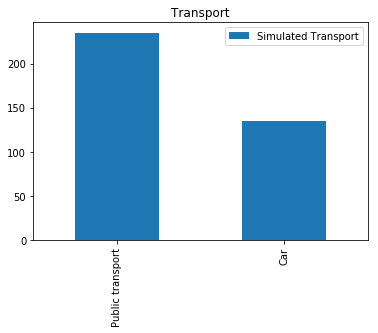

In [56]:
#plot the bar chart of the duration counts
df_tran.plot(kind='bar', title='Transport')
plt.legend(['Simulated Transport'])
plt.show()

In [57]:
# create Cassidy's Transport counts as a dataframe
cass_tran = pd.DataFrame(np.array([[124, 189]]), columns=['Car', 'Public transport'])
cass_tran = cass_tran.transpose()
# check shape
cass_tran.head()


,0
Car,124
Public transport,189


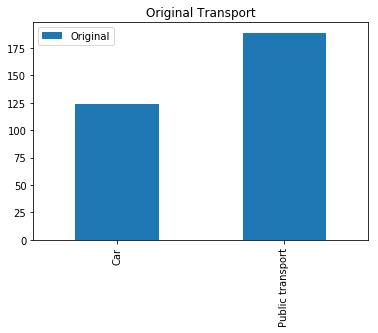

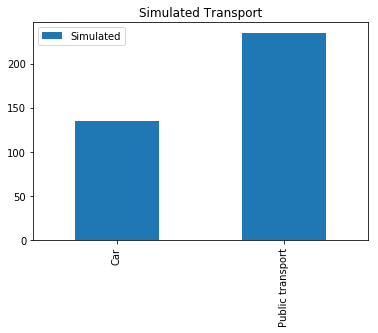

In [58]:
# set the order in which the plot displays the various bars for the original data
cass_tran.reindex(['Car', 'Public transport']).plot(kind='bar', title='Original Transport')
plt.legend(["Original"])
# set the order in which the plot displays the various bars for the simulated data
df_tran.reindex(['Car', 'Public transport']).plot(kind='bar', title='Simulated Transport')
plt.legend(["Simulated"]);
plt.show()


# to do figure out how to display both histograms/bars side by side on the same plot


This shows that most participants used public transportation. It would be interesting to see if traveling by bus or train increased or decreased stress. Car transport provides a greater perception of situational control. However, it is debatable which mode provides greater stress. Being in control of the driving in stressful traffic may be more stress inducing than sleeping on bus or train. I would not expect a clear linear relationship between transportation mode and stress. It would also be useful to introduce more categories into the transport list such as bicycle, car, bus and train.  

### Stress
Cassidy, (1992) measured stress over five domains, home, commute, work, leisure and personal. There was no numerical data given on these measures but three bar charts illustrated the report graphs with data from these domains. 

#### Cassidy's Stress assesment variables
Cassidy 1992 measured stress along five domains namely 
* **Home domain** - This contained measures of perceived stress including perceived financial stress, social support, time spend at home and if home time was used to mediate work related problems
* **Commuting domain** - This contained measures of perceived commuting related stress and commuting mood. 
* **Work domain** - This contained measures of perceived work related stress including the level of participants commitment to their job. Work stress measures were also collected. 
* **Leisure domain** - This contained information on the participants leisure attitude and experiences. It measured how often participants exercised and socialised and their perception of their fitness levels. 
* **Personal domain** - This measured the participants cognitive style such as their problem solving ability and whether or not the attributed events to internal or external factors. It measured participants reported levels of hopelessness, level of control, motivation, confidence and their general perceived stress. It also assessed their level of satisfaction with the direction their life was taking. 

The report contained four histogram comparison charts, one for the distance of commute, one for the duration of commute and one for the impedance of commute and one for the time spent commuting. 

##### Distance
Cassidy found that commuters who travel longer distances reported more negative commuting experiences but did not report more stress than participants traveling shorter distances. However longer distance commuters reported higher scores on motivation and job commitment measures and more positive problem solving ability and use of leisure. Cassidy noted that this suggests longer distance commuters developed coping strategies within other domains to negate the negative effects of a long commute. Commuters who traveled by car had a greater sense of control over their situation however public transport commuters were able to use their commuting time productively along one or more domain. They read, slept,caught up with work etc. Cassidy noted that while this may seem beneficial it may  have long term implications in blurring boundaries between the various domains. In Cassidy's study longer distance commuters scored lower than other participants on the intention to continue to commute at this distance. Cassidy suggested that this shows participants are aware of the negative impact long commutes are having on their other domains. 

##### Duration
Participants reported more negative and less positive responses as the duration of commute increased. There was significantly more work related stress reported for participants with higher duration of commute.

##### Impedance
This measure was the strongest indicator of stress. The greater the impedance i.e. the slower the speed reported significantly more negative and less positive experiences over most of the domains. Cassidy was cautious in drawing conclusions however he suggested there may be an element of 'learned helplessness' when participants cannot control the speed it takes them to and from work. 

##### Time
Cassidy found participants who were commuting for several years had more positive perceptions of their commute. This may be due to those who dislike commuting leaving the commuting pool resulting in a hardier long timer commuter population. There was some support for this in the problem solving styles of the longer commuter and their levels of optimism. However long time commuters also showed higher work commitment but lower achievement motivation. Cassidy suggested this showed their commitment to their job which also had negative impact on their home and leisure domain.  

##### Transport

Cassidy also investigated mode of transportation. He found that participant car users had more positive experiences than train users. Car users perceived themselves as having more control, spending more time at home and less time commuting than measures warranted. Schaeffer et al as cited in Cassidy, 1992 found that having control was positively associated with lower physiological measures such as lower blood pressure, stress and hostility levels. 




### Stress score on PSS
Firstly the score on the PSS was simulated as an indicator of general stress levels. This was simulated with np.random.choice. First, a template for the 10 questions was created and answers for each question were simulated via the choice function. 

In [59]:
# create the questionnaire dataframe 
df_q = pd.DataFrame(columns = ['Question 1','Question 2','Question 3','Question 4','Question 5','Question 6','Question 7','Question 8','Question 9','Question 10', 'PSS'], index = x)
#check the question headings
df_q.head()



,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#for each question fill it with simulated responses
# create the stress band resposes 0 - never 1 - almost never 2 - sometimes 3 - fairly often 4 - very often
responses = [0, 1, 2, 3, 4]
responses
print("where the response ", responses[0], " equals never" )
print("where the response ", responses[1], " equals almost never" )
print("where the response ", responses[2], " equals sometimes" )
print("where the response ", responses[3], " equals fairly often" )
print("where the response ", responses[4], " equals very often" )



where the response  0  equals never
where the response  1  equals almost never
where the response  2  equals sometimes
where the response  3  equals fairly often
where the response  4  equals very often


Stress scores is calculated by summing each participants responses to the 10 questions. The minimum score achievable is 0 (a response of 0 for every question) and the maximum is $4 \times 10 = 40$ (a response of 4 for every question)

In [61]:
# generate the transport response array
#seed = np.random.seed(1)
#seed
y_q1 = np.random.choice(responses, size)
y_q2 = np.random.choice(responses, size)
y_q3 = np.random.choice(responses, size)
y_q4 = np.random.choice(responses, size)
y_q5 = np.random.choice(responses, size)
y_q6 = np.random.choice(responses, size)
y_q7 = np.random.choice(responses, size)
y_q8 = np.random.choice(responses, size)
y_q9 = np.random.choice(responses, size)
y_q10 = np.random.choice(responses, size)

# check the first few values in one of the above arrays to see if it looks right
y_q5[:7]


array([1, 2, 2, 2, 1, 2, 3])

In [62]:
# put the array into the dataframe

df_q['Question 1'] = pd.Series(y_q1)
df_q['Question 2'] = pd.Series(y_q2)
df_q['Question 3'] = pd.Series(y_q3)
df_q['Question 4'] = pd.Series(y_q4)
df_q['Question 5'] = pd.Series(y_q5)
df_q['Question 6'] = pd.Series(y_q6)
df_q['Question 7'] = pd.Series(y_q7)
df_q['Question 8'] = pd.Series(y_q8)
df_q['Question 9'] = pd.Series(y_q9)
df_q['Question 10'] = pd.Series(y_q10)
# check the dataframes first few values
df_q['Question 4'].head()

0    0
1    0
2    2
3    0
4    2
Name: Question 4, dtype: int32

In [63]:
# check the start of the question dataframe
df_q.head()


,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS
0,3,1,4,0,1,3,2,0,2,4,NaN
1,3,3,3,0,2,2,3,2,0,0,NaN
2,2,1,1,2,2,2,2,3,0,3,NaN
3,2,3,2,0,2,2,4,3,2,1,NaN
4,4,0,3,2,1,3,3,0,3,0,NaN


In [64]:
# check the end of the question dataframe
df_q.tail()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS
365,3,3,3,4,1,1,4,3,0,4,NaN
366,3,2,1,1,2,3,3,1,3,1,NaN
367,1,1,0,1,3,0,4,2,1,1,NaN
368,4,2,1,2,2,4,4,1,4,4,NaN
369,4,0,1,3,4,4,2,1,1,4,NaN


Now sum up the question scores on the 10 questions for each participant by summing rows. 

Questions 4, 5, 7 and 8 require a reversal of their responses. 

In [65]:
# take a copy of question 4 named tmpQuestion 4
df_q['tmpQuestion 4'] = df_q['Question 4']
# select all the values that are 0, 1, 2, 3, 4 respectively and add 4, 3, 2, 1, 0 respectivley into the tmpQuestion 4
df_q.loc[df_q['Question 4'] == 0, 'tmpQuestion 4'] = 4
df_q.loc[df_q['Question 4'] == 1, 'tmpQuestion 4'] = 3
df_q.loc[df_q['Question 4'] == 2, 'tmpQuestion 4'] = 2
df_q.loc[df_q['Question 4'] == 3, 'tmpQuestion 4'] = 1
df_q.loc[df_q['Question 4'] == 4, 'tmpQuestion 4'] = 0
#check the headings and values
df_q
# take a copy of question 5 named tmpQuestion 5
df_q['tmpQuestion 5'] = df_q['Question 5']
# select all the values that are 0, 1, 2, 3, 4 respectively and add 4, 3, 2, 1, 0 respectivley into the tmpQuestion 5
df_q.loc[df_q['Question 5'] == 0, 'tmpQuestion 5'] = 4
df_q.loc[df_q['Question 5'] == 1, 'tmpQuestion 5'] = 3
df_q.loc[df_q['Question 5'] == 2, 'tmpQuestion 5'] = 2
df_q.loc[df_q['Question 5'] == 3, 'tmpQuestion 5'] = 1
df_q.loc[df_q['Question 5'] == 4, 'tmpQuestion 5'] = 0
#check the headings and values
df_q
# take a copy of question 7 named tmpQuestion 7
df_q['tmpQuestion 7'] = df_q['Question 7']
# select all the values that are 0, 1, 2, 3, 4 respectively and add 4, 3, 2, 1, 0 respectivley into the tmpQuestion 7
df_q.loc[df_q['Question 7'] == 0, 'tmpQuestion 7'] = 4
df_q.loc[df_q['Question 7'] == 1, 'tmpQuestion 7'] = 3
df_q.loc[df_q['Question 7'] == 2, 'tmpQuestion 7'] = 2
df_q.loc[df_q['Question 7'] == 3, 'tmpQuestion 7'] = 1
df_q.loc[df_q['Question 7'] == 4, 'tmpQuestion 7'] = 0
#check the headings and values
df_q
# take a copy of question 4 named tmpQuestion 8
df_q['tmpQuestion 8'] = df_q['Question 8']
# select all the values that are 0, 1, 2, 3, 4 respectively and add 4, 3, 2, 1, 0 respectivley into the tmpQuestion 8
df_q.loc[df_q['Question 8'] == 0, 'tmpQuestion 8'] = 4
df_q.loc[df_q['Question 8'] == 1, 'tmpQuestion 8'] = 3
df_q.loc[df_q['Question 8'] == 2, 'tmpQuestion 8'] = 2
df_q.loc[df_q['Question 8'] == 3, 'tmpQuestion 8'] = 1
df_q.loc[df_q['Question 8'] == 4, 'tmpQuestion 8'] = 0
#check the headings and values
df_q.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS,tmpQuestion 4,tmpQuestion 5,tmpQuestion 7,tmpQuestion 8
0,3,1,4,0,1,3,2,0,2,4,NaN,4,3,2,4
1,3,3,3,0,2,2,3,2,0,0,NaN,4,2,1,2
2,2,1,1,2,2,2,2,3,0,3,NaN,2,2,2,1
3,2,3,2,0,2,2,4,3,2,1,NaN,4,2,0,1
4,4,0,3,2,1,3,3,0,3,0,NaN,2,3,1,4


In [66]:
#check question 4 column
print("the first few values in question 4 are ", df_q['Question 4'][:7])



the first few values in question 4 are  0    0
1    0
2    2
3    0
4    2
5    4
6    0
Name: Question 4, dtype: int32


In [67]:
# copy the temp values into question 4
df_q['Question 4'] = df_q['tmpQuestion 4']
#check question 4 column
print("the first few values in question 4 are ", df_q['Question 4'][:7])


the first few values in question 4 are  0    4
1    4
2    2
3    4
4    2
5    0
6    4
Name: Question 4, dtype: int32


In [68]:
# drop tmpQuestion 4 column
df_q.drop(['tmpQuestion 4'], axis=1, inplace = True)
df_q.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS,tmpQuestion 5,tmpQuestion 7,tmpQuestion 8
0,3,1,4,4,1,3,2,0,2,4,NaN,3,2,4
1,3,3,3,4,2,2,3,2,0,0,NaN,2,1,2
2,2,1,1,2,2,2,2,3,0,3,NaN,2,2,1
3,2,3,2,4,2,2,4,3,2,1,NaN,2,0,1
4,4,0,3,2,1,3,3,0,3,0,NaN,3,1,4


In [69]:
#check question 5 column
print("the first few values in question 5 are ", df_q['Question 5'][:7])



the first few values in question 5 are  0    1
1    2
2    2
3    2
4    1
5    2
6    3
Name: Question 5, dtype: int32


In [70]:
# copy the temp values into question 5
df_q['Question 5'] = df_q['tmpQuestion 5']
#check question 5 column
print("the first few values in question 5 are ", df_q['Question 5'][:7])


the first few values in question 5 are  0    3
1    2
2    2
3    2
4    3
5    2
6    1
Name: Question 5, dtype: int32


In [71]:
# drop tmpQuestion 5 column
df_q.drop(['tmpQuestion 5'], axis=1, inplace = True)
df_q.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS,tmpQuestion 7,tmpQuestion 8
0,3,1,4,4,3,3,2,0,2,4,NaN,2,4
1,3,3,3,4,2,2,3,2,0,0,NaN,1,2
2,2,1,1,2,2,2,2,3,0,3,NaN,2,1
3,2,3,2,4,2,2,4,3,2,1,NaN,0,1
4,4,0,3,2,3,3,3,0,3,0,NaN,1,4


In [72]:
#check question 7 column
print("the first few values in question 7 are ", df_q['Question 7'][:7])



the first few values in question 7 are  0    2
1    3
2    2
3    4
4    3
5    3
6    3
Name: Question 7, dtype: int32


In [73]:
# copy the temp values into question 7
df_q['Question 7'] = df_q['tmpQuestion 7']
#check question 7 column
print("the first few values in question 7 are ", df_q['Question 7'][:7])


the first few values in question 7 are  0    2
1    1
2    2
3    0
4    1
5    1
6    1
Name: Question 7, dtype: int32


In [74]:
# drop tmpQuestion 7 column
df_q.drop(['tmpQuestion 7'], axis=1, inplace = True)
df_q.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS,tmpQuestion 8
0,3,1,4,4,3,3,2,0,2,4,NaN,4
1,3,3,3,4,2,2,1,2,0,0,NaN,2
2,2,1,1,2,2,2,2,3,0,3,NaN,1
3,2,3,2,4,2,2,0,3,2,1,NaN,1
4,4,0,3,2,3,3,1,0,3,0,NaN,4


In [75]:
#check question 8 column
print("the first few values in question 8 are ", df_q['Question 8'][:7])



the first few values in question 8 are  0    0
1    2
2    3
3    3
4    0
5    3
6    4
Name: Question 8, dtype: int32


In [76]:
# copy the temp values into question 8
df_q['Question 8'] = df_q['tmpQuestion 8']
#check question 8 column
print("the first few values in question 8 are ", df_q['Question 8'][:7])


the first few values in question 8 are  0    4
1    2
2    1
3    1
4    4
5    1
6    0
Name: Question 8, dtype: int32


In [77]:
# drop tmpQuestion 4 column
df_q.drop(['tmpQuestion 8'], axis=1, inplace = True)
df_q.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS
0,3,1,4,4,3,3,2,4,2,4,NaN
1,3,3,3,4,2,2,1,2,0,0,NaN
2,2,1,1,2,2,2,2,1,0,3,NaN
3,2,3,2,4,2,2,0,1,2,1,NaN
4,4,0,3,2,3,3,1,4,3,0,NaN


In [78]:
# sum the rows to get the stress score
# adapted from https://stackoverflow.com/questions/44003371/all-row-sum-with-pandas-except-one
df_q['PSS'] = df_q.drop('PSS', axis=1).sum(axis=1) # sum the rows that are not 'PSS' and put the answer into 'PSS'
df_q.head()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS
0,3,1,4,4,3,3,2,4,2,4,30
1,3,3,3,4,2,2,1,2,0,0,20
2,2,1,1,2,2,2,2,1,0,3,16
3,2,3,2,4,2,2,0,1,2,1,19
4,4,0,3,2,3,3,1,4,3,0,23


In [79]:
df_q.describe()

,Question 1,Question 2,Question 3,Question 4,Question 5,Question 6,Question 7,Question 8,Question 9,Question 10,PSS
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,2.002703,2.143243,2.035135,1.983784,1.989189,2.070270,1.943243,2.083784,2.032432,2.027027,20.310811
std,1.452964,1.378708,1.424280,1.425572,1.419909,1.435301,1.414030,1.343864,1.404224,1.371141,4.041538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,20.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,23.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,34.000000


In [80]:
# add the stress score to the dataframe
df['Stress'] = df_q['PSS']
df.head()


,Distance,Duration,Time,Impedance,Stress,Transport
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,30,Public transport
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,20,Car
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,16,Public transport
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,19,Car
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,23,Public transport


In [81]:
df.describe()

,Stress
count,370.000000
mean,20.310811
std,4.041538
min,9.000000
25%,18.000000
50%,20.000000
75%,23.000000
max,34.000000


#### Simplification of the Stress variable

The measure of stress in Cassidy's report was calculated along five domains. Neither the questions on the survey nor the method of scoring was obvious in the report. Hence this project makes some assumptions and simplifications. A general stress indicator is used via the PSS. I was unsure how to link the variables, (distance, duration, time, impedance and transport) to the stress score. I settled on adding weightings based on research indicating if the variable extremes helped or hindered stress levels. There is problems with this as I have no evidence that such a scale passes reliability or validity in what it purports to measure. However the assignment was to simulate the data and not to develop the formula underlying the data (if such a formula even exists). With this in mind the challenge was to add values to the PSS score based on responses to the survey questions. The PSS responses to the 10 questions were numbers from 0 to 4 so the minimum possible value was 0 and the maximum possible value was 40. The adjustments to this scale were as follows. 

#### Adjustments
Adjustments will then be added on to the PSS depending on participants responses to the other variables on the survey. 
##### Distance
Evidence suggests that longer commute distances is related to higher stress levels in commuters (Chatterjee et al. 2017). There were four bands in the Distance variable so these were rated 1 for 0-5 miles band, 2 for 6-15 miles band, 3 for the 16-30 miles and 4 for over 30 miles band. 



In [82]:
# Score distance
# take a copy of the distance data and put it in a new column
df['Distance Score'] = df['Distance']
# check it
df.head()

,Distance,Duration,Time,Impedance,Stress,Transport,Distance Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,30,Public transport,Over 30 miles
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,20,Car,0-5 miles
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,16,Public transport,0-5 miles
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,19,Car,6-15 miles
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,23,Public transport,16-30 miles


In [83]:
# find all values in distance that are '0-5' and set it to 1 in the distance score column etc...
# the less miles travelled the less stress
df.loc[df['Distance'] == '0-5 miles', 'Distance Score'] = 1
df.loc[df['Distance'] == '6-15 miles', 'Distance Score'] = 2
df.loc[df['Distance'] == '16-30 miles', 'Distance Score'] = 4
df.loc[df['Distance'] == 'Over 30 miles', 'Distance Score'] = 8
# check it
df.head()

,Distance,Duration,Time,Impedance,Stress,Transport,Distance Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,30,Public transport,8
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,20,Car,1
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,16,Public transport,1
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,19,Car,2
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,23,Public transport,4


In [84]:
# add the Distance score to the stress value
df['Stress'] = df['Stress'] + df['Distance Score'] #this is producing errors
# check it
df.head()


,Distance,Duration,Time,Impedance,Stress,Transport,Distance Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,38,Public transport,8
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,21,Car,1
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,17,Public transport,1
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,21,Car,2
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,27,Public transport,4


In [85]:
# check end of dataframe
df.tail()

,Distance,Duration,Time,Impedance,Stress,Transport,Distance Score
365,0-5 miles,30-60 minutes,60-131 months,17 mph or less,19,Public transport,1
366,6-15 miles,Over 60 minutes,30-60 months,17 mph or less,24,Car,2
367,Over 30 miles,0-30 minutes,30-60 months,17 mph or less,18,Car,8
368,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,27,Car,1
369,0-5 miles,30-60 minutes,30-60 months,17 mph or less,21,Public transport,1


##### Duration
By the same reasoning that distance is positively correlated to stress levels (increased stress levels with increasing distance of commute), duration,  being a function of distance (speed of commute = distance of commute divided by duration of commute) is also linked to stress levels. The greater the duration of the commute i.e. the daily time taken to commute the more stress is experienced by the commuter(Chatterjee et al. 2017). There were three Duration of commute bands, 0-30 minutes was scored as a 1, 30-60 minutes was scored as 2 and over 60 minutes was scored as 3. 


In [86]:
# Score duration
# take a copy of the duration data and put it in a new column
df['Duration Score'] = df['Duration']
# check the first few rows
df.head()


,Distance,Duration,Time,Impedance,Stress,Transport,Distance Score,Duration Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,38,Public transport,8,30-60 minutes
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,21,Car,1,Over 60 minutes
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,17,Public transport,1,30-60 minutes
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,21,Car,2,0-30 minutes
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,27,Public transport,4,0-30 minutes


In [87]:
# find all values in duration that are '0-30 minutes' and set it to 0 in the duration score column etc...
# the shorter the commute duration the less stress
df.loc[df['Duration'] == '0-30 minutes', 'Duration Score'] = 1
df.loc[df['Duration'] == '30-60 minutes', 'Duration Score'] = 2
df.loc[df['Duration'] == 'Over 60 minutes', 'Duration Score'] = 3
# check the first few rows
df.head()

,Distance,Duration,Time,Impedance,Stress,Transport,Distance Score,Duration Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,38,Public transport,8,2
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,21,Car,1,3
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,17,Public transport,1,2
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,21,Car,2,1
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,27,Public transport,4,1


In [88]:
# add the duration score to the stress value
df['Stress'] = df['Stress'] + df['Duration Score']
df.head()

,Distance,Duration,Time,Impedance,Stress,Transport,Distance Score,Duration Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,40,Public transport,8,2
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,24,Car,1,3
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,19,Public transport,1,2
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,22,Car,2,1
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,28,Public transport,4,1


##### Impedance
Similar to distance and duration, impedance is correlated to stress levels as it is linked to the speed taken to make the commute. Hence slower speeds increases stress levels. As this was the greatest indicator in Cassidy's report higher weightings were given to this. There were three impedance bands, Over 30 mph was rated as 2, 17.3-30 mph was rated as 4 and 17 mph or less was rated as 6. 

In [89]:
# Score impedance
# take a copy of the impendace data and put it in a new column
df['Impedance Score'] = df['Impedance']
# check the first few values
df.head()       

,Distance,Duration,Time,Impedance,Stress,Transport,Distance Score,Duration Score,Impedance Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,40,Public transport,8,2,17.3-30 mph
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,24,Car,1,3,17 mph or less
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,19,Public transport,1,2,17 mph or less
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,22,Car,2,1,17.3-30 mph
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,28,Public transport,4,1,Over 30 mph


In [90]:
# find all values in impendace that are '17 mph or less' and set it to 2 in the impedance score column
# the slower the speed the more the stress
df.loc[df['Impedance'] == '17 mph or less', 'Impedance Score'] = 2
df.loc[df['Impedance'] == '17.3-30 mph', 'Impedance Score'] = 4
df.loc[df['Impedance'] == 'Over 30 mph', 'Impedance Score'] = 16
# check the first few values
df.head()

,Distance,Duration,Time,Impedance,Stress,Transport,Distance Score,Duration Score,Impedance Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,40,Public transport,8,2,4
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,24,Car,1,3,2
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,19,Public transport,1,2,2
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,22,Car,2,1,4
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,28,Public transport,4,1,16


In [91]:
# add the impedance score to the stress value
df['Stress'] = df['Stress'] + df['Impedance Score']
# check it
df.head()

,Distance,Duration,Time,Impedance,Stress,Transport,Distance Score,Duration Score,Impedance Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,44,Public transport,8,2,4
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,26,Car,1,3,2
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,21,Public transport,1,2,2
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,26,Car,2,1,4
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,44,Public transport,4,1,16


##### Time
Schneider as cited in Schaefer 2005 noted that long time commuters of long distances reported negative impact in many areas of their life. Ideally this variable should also be linked to increasing distances however for simplicity it is treated independently. There were four bands in this variable, a rating of 1 was given to the shortest band 1-29 months; a rating of 2 was given to the 30-60 months band; A rating of 3 was given to the 60-131 months band and a rating of 4 was given to the over 132 months band. 

In [92]:
# Score time
# take a copy of the time data and put it in a new column
df['Time Score'] = df['Time']
# check the first few values
df.head()

,Distance,Duration,Time,Impedance,Stress,Transport,Distance Score,Duration Score,Impedance Score,Time Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,44,Public transport,8,2,4,1-29 months
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,26,Car,1,3,2,1-29 months
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,21,Public transport,1,2,2,Over 132 months
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,26,Car,2,1,4,Over 132 months
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,44,Public transport,4,1,16,1-29 months


In [93]:
# find all values in time that are '1-29 months' and set it to 0 in the time score column etc...
df.loc[df['Time'] == '1-29 months', 'Time Score'] = 1
df.loc[df['Time'] == '30-60 months', 'Time Score'] = 2
df.loc[df['Time'] == '60-131 months', 'Time Score'] = 3
df.loc[df['Time'] == 'Over 132 months', 'Time Score'] = 4
# check the first few values
df.head()

,Distance,Duration,Time,Impedance,Stress,Transport,Distance Score,Duration Score,Impedance Score,Time Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,44,Public transport,8,2,4,1
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,26,Car,1,3,2,1
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,21,Public transport,1,2,2,4
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,26,Car,2,1,4,4
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,44,Public transport,4,1,16,1


In [94]:
# add the time score to the stress value
df['Stress'] = df['Stress'] + df['Time Score']
# check the first few values
df.head()

,Distance,Duration,Time,Impedance,Stress,Transport,Distance Score,Duration Score,Impedance Score,Time Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,45,Public transport,8,2,4,1
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,27,Car,1,3,2,1
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,25,Public transport,1,2,2,4
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,30,Car,2,1,4,4
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,45,Public transport,4,1,16,1


##### Transport
There is conflicting evidence about the method of commuting and stress levels. Cassidy reported that car users have more positive and less negative commuting experience than those traveling by train (Costa et al as cited in Cassidy, 1992; Gulian et al as cited in Cassidy 1992). However there may be other factors going one such as locus of perceived control and agency. Schaeffer as cited in Cassidy 1992 found control  was positively linked to reduced stress levels and stress measures such as blood pressure. However Wener and Evans, (2011) found car commuters had significantly more perceived stress and low mood than other modes of transport. This may be due to changes in the number of commuters from 1992 to 2011. It was not clear which direction to rank the transport bands of car and public transport hence this variable was not added to the stress score. 

The maximum stress score should be 57 or under (40 for the PSS, 4 for Distance, 3 for duration, 4 for Time and 6 for Impedance). The minimum stress score should be 5 (0 for PSS, 1 for distance, 1 for duration, 1 for time and 2 for impedance) 

In [95]:
print("The maximum possible score is ", 40+4+3+4+6)
print("The minimum possible score is ", 0+1+1+1+2)

The maximum possible score is  57
The minimum possible score is  5


The intermediate columns in the dataframe can be removed once the Stress column is calculated.

In [96]:
# drop variable score values as they are now in the stress column
df.drop(['Impedance Score', 'Distance Score', 'Duration Score', 'Time Score'], axis=1, inplace = True)
# rename Stress as Stress Score
df.rename(columns={'Stress': 'Stress Score'}, inplace = True)
df.head()


,Distance,Duration,Time,Impedance,Stress Score,Transport
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,45,Public transport
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,27,Car
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,25,Public transport
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,30,Car
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,45,Public transport


The method of transport is not used in the calculations of the stress variable so it can be dropped from the dataframe.

In [97]:
# drop transport as it is not used
df.drop(['Transport'], axis=1, inplace = True)
df.head()

,Distance,Duration,Time,Impedance,Stress Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,45
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,27
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,25
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,30
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,45


 The full data is below along with the information and description of it.                      


In [98]:
df

,Distance,Duration,Time,Impedance,Stress Score
0,Over 30 miles,30-60 minutes,1-29 months,17.3-30 mph,45
1,0-5 miles,Over 60 minutes,1-29 months,17 mph or less,27
2,0-5 miles,30-60 minutes,Over 132 months,17 mph or less,25
3,6-15 miles,0-30 minutes,Over 132 months,17.3-30 mph,30
4,16-30 miles,0-30 minutes,1-29 months,Over 30 mph,45
5,Over 30 miles,0-30 minutes,Over 132 months,17 mph or less,26
6,6-15 miles,30-60 minutes,60-131 months,17 mph or less,29
7,0-5 miles,30-60 minutes,30-60 months,17 mph or less,21
8,16-30 miles,30-60 minutes,30-60 months,17 mph or less,23
9,0-5 miles,Over 60 minutes,Over 132 months,17 mph or less,32


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 5 columns):
Distance        370 non-null object
Duration        370 non-null object
Time            370 non-null object
Impedance       370 non-null object
Stress Score    370 non-null int64
dtypes: int64(1), object(4)
memory usage: 14.5+ KB


In [100]:
df.describe()

,Stress Score
count,370.000000
mean,32.494595
std,7.033888
min,18.000000
25%,28.000000
50%,31.000000
75%,36.000000
max,58.000000


In [101]:
df.nunique()

Distance         4
Duration         3
Time             4
Impedance        3
Stress Score    34
dtype: int64

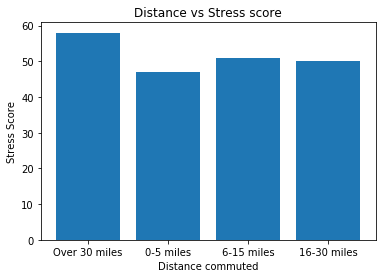

In [102]:
plt.bar(df['Distance'], df['Stress Score'])
plt.title("Distance vs Stress score")
plt.xlabel("Distance commuted")
plt.ylabel("Stress Score")
plt.show() 

Add a para on this compared and compare it to cassidy

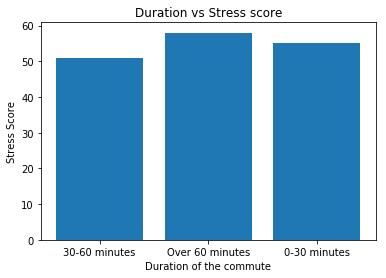

In [103]:
plt.bar(df['Duration'], df['Stress Score'])
plt.title("Duration vs Stress score")
plt.xlabel("Duration of the commute")
plt.ylabel("Stress Score")
plt.show() 

Add a para on this compared and compare it to cassidy

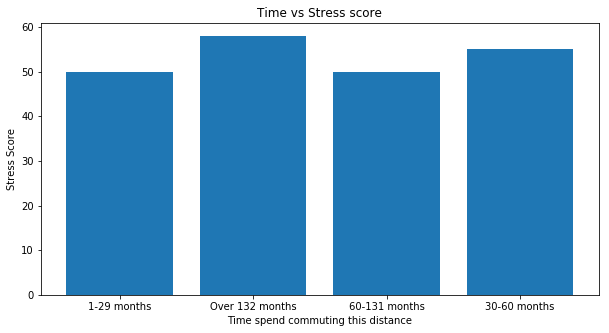

In [104]:
# labels are a bit squiched so use figsize
plt.figure(figsize=(10,5))
plt.bar(df['Time'], df['Stress Score'])
plt.title("Time vs Stress score")
plt.xlabel("Time spend commuting this distance")
plt.ylabel("Stress Score")
plt.show() 

Add a para on this compared and compare it to cassidy

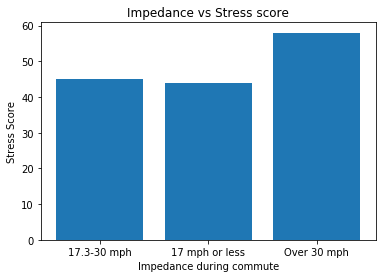

In [105]:
plt.bar(df['Impedance'], df['Stress Score'])
plt.title("Impedance vs Stress score")
plt.xlabel("Impedance during commute")
plt.ylabel("Stress Score")
plt.show() 

Add a para on this compared and compare it to cassidy

add section with the problems with the scoring system
not a linear relationship between point on likert scale and next point on the scale but 1234 etc has same progression. 

## References


American Psychological Association. (2010). Gender and Stress. Retrieved December 5, 2018, from https://www.apa.org/news/press/releases/stress/2010/gender-stress.aspx 


Cassidy, T. (1992),Commuting-related Stress: Consequences and Implications, Employee Councelling Today, Vol. 4 Iss
2 pp. 15 - 21 Retrieved from https://www.researchgate.net/profile/AnthonyTony_Cassidy/publication/235250379_Commuting-related_Stress_Consequences_and_Implications/links/574da3f608ae061b3303533c/Commuting-related-Stress-Consequences-and-Implications.pdf


Central Statistics Office. (2017, August 31). Census of Population 2016 – Profile 6 Commuting in Ireland. Retrieved November 24, 2018, from https://www.cso.ie/en/releasesandpublications/ep/p-cp6ci/p6cii/p6noc/

Chatterjee, K., Clark, B., Martin, A. & Davis, A. (2017). The Commuting and Wellbeing Study: Understanding the Impact of Commuting on People’s Lives. UWE Bristol, UK. 

Cohen, S., Kamarck,, T., & Mermelstein, R. (1983). Perceived Stress Scale. Retrieved December 5, 2018, from https://das.nh.gov/wellness/docs/percieved%20stress%20scale.pdf 


Gatersleben, B., & Uzzell, D. (2007). Affective Appraisals of the Daily Commute: Comparing Perceptions of Drivers, Cyclists, Walkers, and Users of Public Transport. Environment and Behavior, 39(3), 416–431. https://doi.org/10.1177/0013916506294032


Hassard, J., Teoh, K., Cox, T., Dewe, P., Cosma, M., Gründler, R., . . . Van den Broek, K. (2014). Calculating the cost of work-related stress and psychosocial risks (Rep.). Luxembourg: Publications Office of the European Union. doi:10.2802/20493


Kéry, M., & Royle, J. A. (2016). Applied hierarchical modeling in ecology: Analysis of distribution, abundance and species richness in R and BUGS. Retrieved from https://www.sciencedirect.com/topics/earth-and-planetary-sciences/data-simulation

Monteiro, N.M. Shyngle K. Balogun & Kutlo N. Oratile (2014) Managing stress: the influence of gender, age and emotion regulation on coping among university students in Botswana, International Journal of Adolescence and Youth, 19:2, 153-173, DOI: 10.1080/02673843.2014.908784 

Schaefer, A. (2005, October 01). Commuting Takes Its Toll. Retrieved December 6, 2018, from https://www.scientificamerican.com/article/commuting-takes-its-toll/ 

Stutzer, A., & Frey, B. S. (2008). Stress that Doesnt Pay: The Commuting Paradox*. Scandinavian Journal of Economics, 110(2), 339-366. doi:10.1111/j.1467-9442.2008.00542.x 

Wikipedia contributors. (2018, May 31). Perceived Stress Scale. In Wikipedia, The Free Encyclopedia. Retrieved 11:47, December 5, 2018, from https://en.wikipedia.org/w/index.php?title=Perceived_Stress_Scale&oldid=843740320


Wikipedia contributors. (2018, September 17). Stochastic process. In Wikipedia, The Free Encyclopedia. Retrieved 11:19, November 24, 2018, from https://en.wikipedia.org/w/index.php?title=Stochastic_process&oldid=859982240


Wikipedia contributors. (2018, November 12). Fight-or-flight response. In Wikipedia, The Free Encyclopedia. Retrieved 00:59, December 4, 2018, from https://en.wikipedia.org/w/index.php?title=Fight-or-flight_response&oldid=868423450


Wikipedia contributors. (2018, November 23). Human sex ratio. In Wikipedia, The Free Encyclopedia. Retrieved 13:07, November 24, 2018, from https://en.wikipedia.org/w/index.php?title=Human_sex_ratio&oldid=870236802

Wikipedia contributors. (2018, November 26). Likert scale. In Wikipedia, The Free Encyclopedia. Retrieved 12:01, December 5, 2018, from https://en.wikipedia.org/w/index.php?title=Likert_scale&oldid=870626181

Wener, R. E., & Evans, G. W. (2011). Comparing stress of car and train commuters. Transportation Research Part F: Traffic Psychology and Behaviour, 14(2), 111-116. doi:10.1016/j.trf.2010.11.008 


UCLA: Statistical Consulting Group. (n.d.). What is the difference between categorical, ordinal and interval variables? Retrieved December 5, 2018, from https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-interval-variables/ 


NumPy community, (2018). NumPy Reference Release 1.15.1.[ebook] Retrieved from https://docs.scipy.org/doc/numpy/numpy-ref-1.15.1.pdf

Oliphant, T. (2006). Guide to NumPy. 1st ed. [ebook] Available at: https://docs.scipy.org/doc/_static/numpybook.pdf [Accessed 20 Oct. 2018].




https://www.uzh.ch/cmsssl/suz/dam/jcr:ffffffff-866d-1ee0-0000-0000536ff1b9/10.04_stutzer-frey_08.pdf

[ref](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/)

[ref](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.choice.html#numpy.random.choice)

[ref](https://www.datacamp.com/community/tutorials/categorical-data)

matplotlib manual 

code adapted from https://stackoverflow.com/questions/49161120/pandas-python-set-value-of-one-column-based-on-value-in-another-column

